### Учебный проект, посвященный улучшению качества сжатых изображений при помощи нейронных сетей (модель QECNN)

#### Описание задания к лабораторной работе
- Улучшить QECNN модель так, чтобы модифицированная версия:

- выиграла на 100 изображения из файла BSD 500 test.yuv в среднем 0.2 дБ и более по метрике PSNR;
Требования к реализации и результаты:

- При обучении должны использоваться только изображения из папки файла BSD500train.yuv
Построить график функции PSNR/номер изображения для исходной и модифицированной моделей


ФИО студента: `Чжу Вэньтао`

номер группы: `M4145`

#### Описание предложенной модификации

##### 1. SeparableConv2D - `Separable Convolution`
За счет использования сверточного слоя этой структуры сокращается количество параметров модели, а также ускоряется скорость обучения и рассуждения модели.


![Separable Convolution](https://i-blog.csdnimg.cn/blog_migrate/e834e5bb250dac65829df99e78c7b70a.png#pic_center)

Слева указано количество параметров исходной модели, а справа - количество параметров модифицированной модели

![IMAGE 2024-12-02 23:27:59.jpg](<attachment:IMAGE 2024-12-02 23:27:59.jpg>) ![IMAGE 2024-12-02 23:29:09.jpg](<attachment:IMAGE 2024-12-02 23:29:09.jpg>)
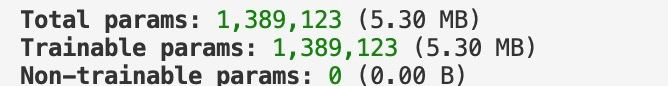
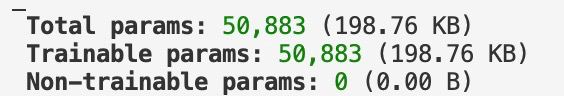

##### Структура модели выглядит следующим образом

```python
def EnhancerModel(fw, fh):
    inputs = layers.Input(shape=(fh, fw, 3))
    
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    
    for _ in range(5):  # 可调整残差块数量
        residual = layers.SeparableConv2D(64, (3, 3), padding='same', activation='relu')(x)
        residual = layers.SeparableConv2D(64, (3, 3), padding='same')(residual)
        x = layers.add([x, residual])
        x = layers.Activation('relu')(x)
    
    outputs = layers.Conv2D(3, (3, 3), padding='same')(x)
    outputs = layers.add([inputs, outputs])
    
    model = Model(inputs, outputs)
    return model
```

##### 2. Residual

Остаточное обучение фокусируется на высокочастотных сигналах, что как раз отвечает потребностям восстановления сжатых изображений：
- Высокочастотные характеристики: артефакты, детали краев, информация о текстуре.

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfq8TSZ5lz_STlxuJ-VjE1V22ELwWfO7AncI3sLL5dlsRadkWL_iVIRDeVc4xhuY-QIkM&usqp=CAU)

##### 3. Меньший размер патча и шаг патча используются для ускорения обучения модели

```
patchsize = 32 | patchstep = 16
```

#### Результат



- Несколько улучшенных изображений

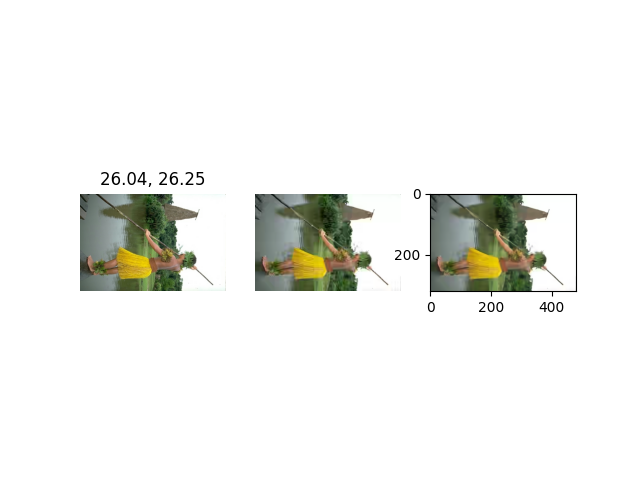 

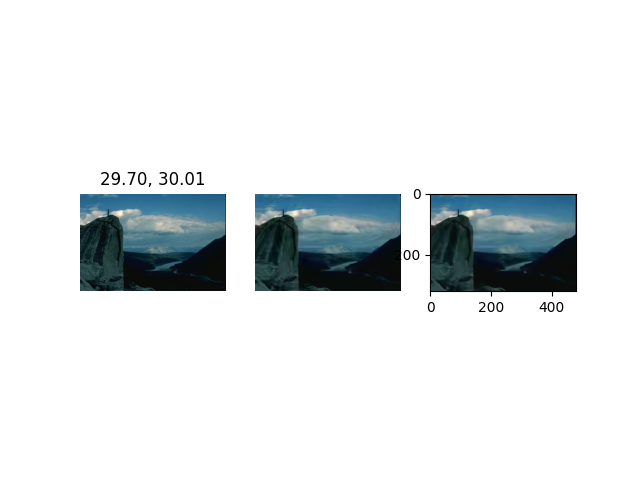 

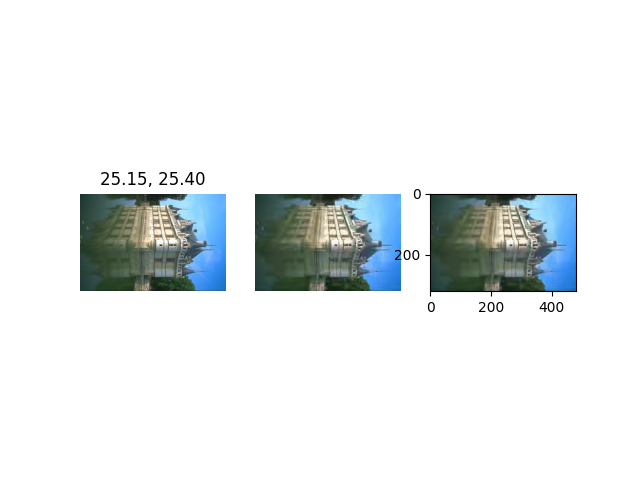

- Соответствующий psnr на 100 тестовых данных - `24.57 -> 24.78`

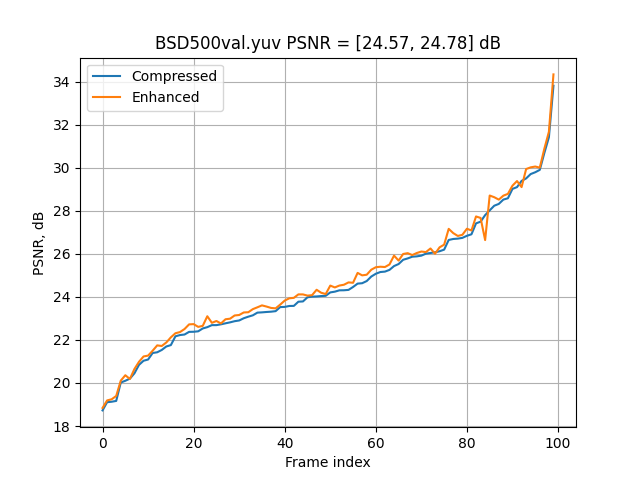